In [1]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy as np
import string
import random
import string
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
import csv
import ast
import seaborn as sns
from scipy.sparse import csr_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Dataset and Exploratory Data Analysis

Identify a dataset to study, and perform an exploratory analysis of the data. Describe the
dataset, including its basic statistics and properties, and report any interesting findings. This
exploratory analysis should motivate the design of your model in the following sections. Datasets
should be reasonably large (e.g. large enough to run the kinds of methods we’ve discussed in
class).

https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions

In [3]:
allRecipes = pd.read_csv('RAW_recipes.csv')  

In [4]:
allRecipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [5]:
interactions = pd.read_csv('RAW_interactions.csv')

In [6]:
interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [7]:
allRecipes.shape, interactions.shape

((231637, 12), (1132367, 5))

In [8]:
dataset = pd.merge(allRecipes, interactions, how='outer', left_on='id', right_on='recipe_id')

In [9]:
dataset.loc[0]

name                     arriba   baked winter squash mexican style
id                                                           137739
minutes                                                          55
contributor_id                                                47892
submitted                                                2005-09-16
tags              ['60-minutes-or-less', 'time-to-make', 'course...
nutrition                     [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]
n_steps                                                          11
steps             ['make a choice and proceed with recipe', 'dep...
description       autumn is my favorite time of year to cook! th...
ingredients       ['winter squash', 'mexican seasoning', 'mixed ...
n_ingredients                                                     7
user_id                                                        4470
recipe_id                                                    137739
date                                            

In [10]:
from pathlib import Path  
filepath = Path('data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
dataset.to_csv(filepath)

In [11]:
import codecs
data = []
with codecs.open('data.csv', encoding = 'utf8', errors = 'replace') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        data.append(row)
data[1]

['0',
 'arriba   baked winter squash mexican style',
 '137739',
 '55',
 '47892',
 '2005-09-16',
 "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
 '[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]',
 '11',
 "['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 

In [12]:
len(data)

1132368

In [13]:
recipe_counts = dataset['recipe_id'].value_counts()
recipe_counts

2886      1613
27208     1601
89204     1579
39087     1448
67256     1322
          ... 
235316       1
292999       1
243042       1
423275       1
247451       1
Name: recipe_id, Length: 231637, dtype: int64

In [14]:
def datum(d):
    return {'name': d[1],
            'recipe_id': int(d[2]),
            'minutes': int(d[3]),
            'recipe_date': d[5],
            'tags': list(ast.literal_eval(d[6])),
            'nutrition': list(ast.literal_eval(d[7])),
            'n_steps': int(d[8]),
            'steps': ' '.join(list(ast.literal_eval(d[9]))),
            'ingredients': list(ast.literal_eval(d[11])),
            'n_ingredients': int(d[12]),
            'review_date': d[15],
            'rating': int(d[16]),
            'review_text': d[17],
            'n_reviews': recipe_counts[int(d[2])]
           }

0: name, 1: recipe_id, 2: minutes, 3: recipe_date, 4: tags, 5: nutrition (calories, total fat, sugar, sodium, protein, saturated fat), 6: n_steps, 7: steps, 8: ingredients, 9: n_ingredients, 10: review_date, 11: rating, 12: review_text, 13: n_reviews

In [15]:
all_data = list(map(lambda x: datum(x), data[1:]))
all_data[0]

{'name': 'arriba   baked winter squash mexican style',
 'recipe_id': 137739,
 'minutes': 55,
 'recipe_date': '2005-09-16',
 'tags': ['60-minutes-or-less',
  'time-to-make',
  'course',
  'main-ingredient',
  'cuisine',
  'preparation',
  'occasion',
  'north-american',
  'side-dishes',
  'vegetables',
  'mexican',
  'easy',
  'fall',
  'holiday-event',
  'vegetarian',
  'winter',
  'dietary',
  'christmas',
  'seasonal',
  'squash'],
 'nutrition': [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0],
 'n_steps': 11,
 'steps': 'make a choice and proceed with recipe depending on size of squash , cut into half or fourths remove seeds for spicy squash , drizzle olive oil or melted butter over each cut squash piece season with mexican seasoning mix ii for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece season with sweet mexican spice mix bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin be care

Exploratory Data Analysis

Plotting the counts of each respective rating:

In [16]:
ratings = np.array([i['rating'] for i in all_data])
ratings

array([5, 5, 5, ..., 1, 5, 0])

<AxesSubplot: ylabel='Count'>

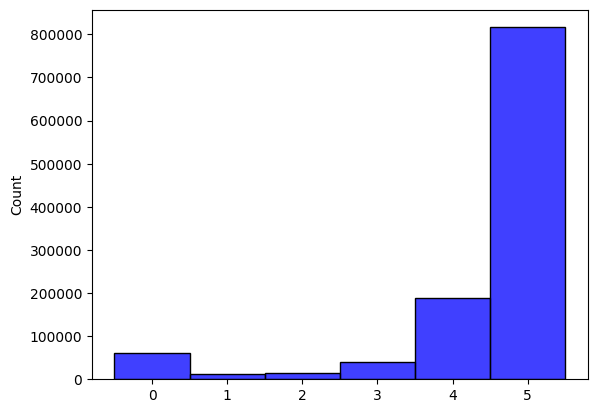

In [17]:
sns.histplot(ratings, color = 'blue', discrete=True, binwidth=1)

Plotting the ratings against the number of calories of each respective recipe:

In [18]:
calories = np.array([i['nutrition'][0] for i in all_data])
calories

array([ 51.5,  51.5,  51.5, ..., 174.9, 174.9, 174.9])

<AxesSubplot: >

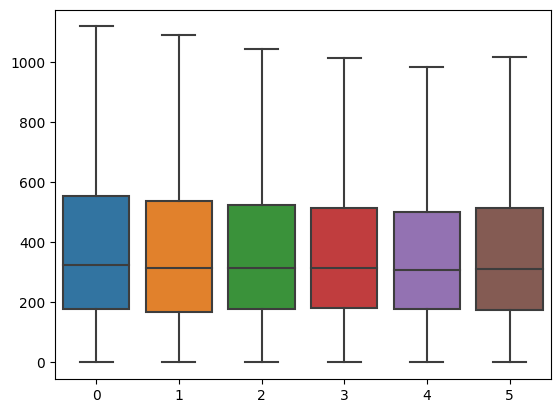

In [19]:
sns.boxplot(x=ratings, y=calories, showfliers=False)

Plotting the ratings against the number of steps of each respective recipe:

In [20]:
n_steps = np.array([i['n_steps'] for i in all_data])
n_steps

array([11, 11, 11, ...,  5,  5,  5])

<AxesSubplot: >

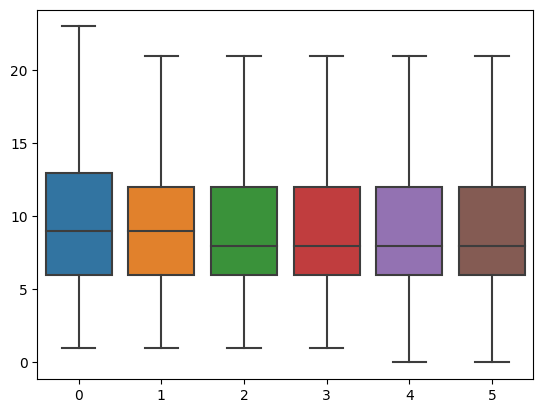

In [21]:
sns.boxplot(x=ratings, y=n_steps, showfliers=False)

Plotting the ratings against the number of comments of each respective recipe:

In [22]:
n_reviews = np.array([i['n_reviews'] for i in all_data])
n_reviews

array([3, 3, 3, ..., 3, 3, 3])

<AxesSubplot: >

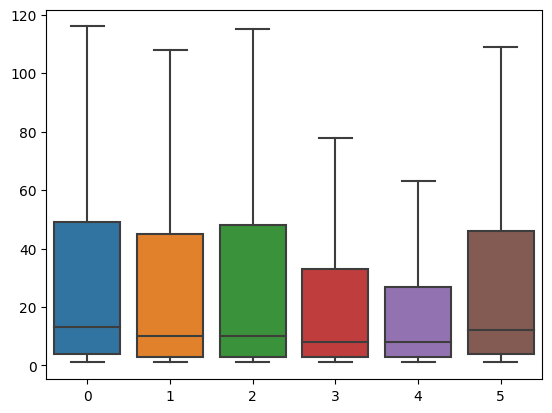

In [23]:
sns.boxplot(x=ratings, y=n_reviews, showfliers=False)

Descriptive statistics of the dataset:

In [24]:
dataset.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,user_id,recipe_id,rating
count,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06
mean,1.608972e+05,3.614684e+04,2.655967e+06,9.627970e+00,8.952028e+00,1.384291e+08,1.608972e+05,4.411016e+00
std,1.303987e+05,8.796494e+06,6.774670e+07,5.819689e+00,3.689908e+00,5.014269e+08,1.303987e+05,1.264752e+00
min,3.800000e+01,0.000000e+00,2.700000e+01,0.000000e+00,1.000000e+00,1.533000e+03,3.800000e+01,0.000000e+00
25%,5.425700e+04,2.000000e+01,3.744900e+04,6.000000e+00,6.000000e+00,1.354700e+05,5.425700e+04,4.000000e+00
50%,1.205470e+05,4.000000e+01,8.983100e+04,8.000000e+00,9.000000e+00,3.309370e+05,1.205470e+05,5.000000e+00
75%,2.438520e+05,7.000000e+01,2.427290e+05,1.200000e+01,1.100000e+01,8.045500e+05,2.438520e+05,5.000000e+00
max,5.377160e+05,2.147484e+09,2.002290e+09,1.450000e+02,4.300000e+01,2.002373e+09,5.377160e+05,5.000000e+00


In [25]:
dataset.median()

id                120547.0
minutes               40.0
contributor_id     89831.0
n_steps                8.0
n_ingredients          9.0
user_id           330937.0
recipe_id         120547.0
rating                 5.0
dtype: float64

Findings: It looks like amongst the numerical characteristics, there isn't much variation between each rating value...

____________________________________

# Prediction

Identify a predictive task that can be studied on this dataset. Describe how you will evaluate
your model at this predictive task, what relevant baselines can be used for comparison, and how
you will assess the validity of your model’s predictions. It’s also important in this section to
carefully describe what features you will use and how you had to process the data to obtain them.
Make sure to select a task and models that are relevant to the course content; if you want to try
out models you’ve seen in other classes that’s fine, but you should still implement models from
this class as baselines / comparison points.

We are going to predict the ratings based off of the other characteristics. For text data, we will use a bag of words. 

Baselines: Since the dataset is predominantly ratings of 5, we will find the accuracy when predicting just 5's, and compare it to the accuracy of our model. This is the baseline we will use.

Assess validity: We create a validation set by using sklearn and then we train the model with our traning set and then we use the validation set to check if we get a similar output/accuracy. If yes, that shows our model is valid and we will continue to predict the ratings with the testing set and check our accuracy for that.

What features we will use, and how we had to process the data to obtain them: ???

Create a bag of words for each of the text columns:

In [26]:
# name_wordCount = defaultdict(int)
# punctuation = set(string.punctuation)
# for d in all_data:
#     r = ''.join([c for c in d['name'].lower() if not c in punctuation])
#     for w in r.split():
#         name_wordCount[w] += 1

# len(name_wordCount)

In [27]:
# name_counts = [(name_wordCount[w], w) for w in name_wordCount]
# name_counts.sort(reverse=True)
# name_counts[:10]

In [28]:
# name_words = [x[1] for x in name_counts[:1000]]

In [29]:
# name_wordId = dict(zip(name_words, range(len(name_words))))
# name_wordSet = set(name_words)

In [30]:
# steps_wordCount = defaultdict(int)
# punctuation = set(string.punctuation)
# for d in all_data:
#     r = ''.join([c for c in d['steps'].lower() if not c in punctuation])
#     for w in r.split():
#         steps_wordCount[w] += 1

# len(steps_wordCount)

In [31]:
# steps_counts = [(steps_wordCount[w], w) for w in steps_wordCount]
# steps_counts.sort(reverse=True)
# steps_counts[:10]

In [32]:
# steps_words = [x[1] for x in steps_counts[:1000]]

In [33]:
# steps_wordId = dict(zip(steps_words, range(len(steps_words))))
# steps_wordSet = set(steps_words)

In [34]:
# reviewtext_wordCount = defaultdict(int)
# punctuation = set(string.punctuation)
# for d in all_data:
#     r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
#     for w in r.split():
#         reviewtext_wordCount[w] += 1

# len(reviewtext_wordCount)

In [35]:
# reviewtext_counts = [(reviewtext_wordCount[w], w) for w in reviewtext_wordCount]
# reviewtext_counts.sort(reverse=True)
# reviewtext_counts[:10]

In [36]:
# reviewtext_words = [x[1] for x in reviewtext_counts[:1000]]

In [37]:
# reviewtext_wordId = dict(zip(reviewtext_words, range(len(reviewtext_words))))
# reviewtext_wordSet = set(reviewtext_words)

In [38]:
from collections import Counter
ing_counts = Counter([ing for d in all_data for ing in d['ingredients']])
ing_counts = ing_counts.most_common(1000)
ing_counts

[('salt', 468403),
 ('butter', 299645),
 ('sugar', 233854),
 ('onion', 193779),
 ('water', 181780),
 ('eggs', 178000),
 ('flour', 154306),
 ('olive oil', 151781),
 ('milk', 140283),
 ('garlic cloves', 119550),
 ('pepper', 113697),
 ('brown sugar', 107911),
 ('garlic', 102506),
 ('baking powder', 99630),
 ('all-purpose flour', 98681),
 ('egg', 93038),
 ('baking soda', 87953),
 ('parmesan cheese', 87460),
 ('vanilla', 84014),
 ('vegetable oil', 79001),
 ('garlic powder', 78323),
 ('salt and pepper', 75222),
 ('black pepper', 73008),
 ('lemon juice', 64668),
 ('cinnamon', 64623),
 ('sour cream', 61374),
 ('cream cheese', 53611),
 ('oil', 51507),
 ('vanilla extract', 50807),
 ('soy sauce', 50631),
 ('tomatoes', 50127),
 ('paprika', 49322),
 ('cheddar cheese', 48567),
 ('onions', 48041),
 ('chicken broth', 47918),
 ('celery', 45867),
 ('honey', 45130),
 ('mayonnaise', 44653),
 ('garlic clove', 41608),
 ('worcestershire sauce', 41337),
 ('cornstarch', 41277),
 ('unsalted butter', 38858),
 ('

In [39]:
ings = [ing for ing, count in ing_counts]
ings[:10]

['salt',
 'butter',
 'sugar',
 'onion',
 'water',
 'eggs',
 'flour',
 'olive oil',
 'milk',
 'garlic cloves']

In [40]:
ingsIdx = dict(zip(ings, range(len(ings))))

In [41]:
from datetime import datetime

In [42]:
def date_diff(d1, d2):
    d1 = datetime.strptime(d1, '%Y-%m-%d')
    d2 = datetime.strptime(d2, '%Y-%m-%d')
    return d2 - d1

In [43]:
# def bow(datum, words, wordId, name):
#     feat = [0]*len(words)
#     r = ''.join([c for c in datum[name].lower() if not c in punctuation])
#     for w in r.split():
#         if w in words:
#             feat[wordId[w]] += 1
#     return feat

In [44]:
def feature(datum):
    feat = [0] * len(ings)
#     feat += bow(datum, name_words, name_wordId, 'name')
#     feat.append(datum['minutes'])
#     feat.append(date_diff(datum['recipe_date'], datum['review_date']))
#     # do something with the tags
#     feat += datum['nutrition']
#     feat.append(datum['n_steps'])
#     feat += bow(datum, steps_words, steps_wordId, 'steps')
#     # do something with the ingredients
    for ing in datum['ingredients']:
        if ing in ingsIdx:
            feat[ingsIdx[ing]] += 1
#     feat.append(datum['n_ingredients'])
#     feat += bow(datum, reviewtext_words, reviewtext_wordId, 'review_text')
#     feat += bow(datum, reviewtext_words, reviewtext_wordId, 'review_text')
#     feat.append(datum['n_reviews'])
    feat.append(1) # offset
    return feat

In [45]:
X = [feature(d) for d in all_data]
y = [d['rating'] for d in all_data]

In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, shuffle=True)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

# X_valid, y_valid = X_train[-len(X_train)//10:], y_train[-len(y_train)//10:]
# X_train, y_train = X_train[:len(X_train)//10], y_train[:len(y_train)//10]

In [47]:
len(X_train), len(X_valid), len(X_test)

(634124, 158532, 339711)

In [48]:
mod = linear_model.LogisticRegression(class_weight = "balanced")
mod.fit(X_train, y_train)
valid_pred = mod.predict(X_valid)
valid_correct = valid_pred == y_valid
valid_acc = sum(valid_correct) / len(y_valid)

In [49]:
def MSE(predictions, y):
    diffs = [(a-b)**2 for (a,b) in zip(predictions, y)]
    return sum(diffs)/len(diffs)

In [50]:
mse = MSE(valid_pred, y_valid)
mse

8.381374107435724

In [51]:
mod2 = linear_model.LinearRegression()
mod2.fit(X_train, y_train)
valid_pred2 = mod2.predict(X_valid)

In [52]:
mse2 = MSE(valid_pred2, y_valid)
mse2

1.594456961172219

In [53]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in all_data[:10000]:
    r = ''.join([c for c in d['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    for w in ws + ws2:
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()
mostCommon = [x[1] for x in counts][:1000]
wordId = dict(zip(mostCommon, range(len(mostCommon))))
wordSet = set(mostCommon)

def bow_review(datum):
    feat = [0]*len(wordSet)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punctuation])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
    for w in ws + ws2:
        if w in wordSet:
            feat[wordId[w]] += 1
    feat.append(1) #offset
    return feat

In [54]:
def feature2(datum):
    feat = [0] * len(ings)
    for ing in datum['ingredients']:
        if ing in ingsIdx:
            feat[ingsIdx[ing]] += 1
    feat += bow_review(datum)
    feat.append(1) # offset
    return feat

In [55]:
X = [feature2(d) for d in all_data]
y = [d['rating'] for d in all_data]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, shuffle=True)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [ ]:
mod2 = linear_model.LinearRegression()
mod2.fit(X_train, y_train)
valid_pred2 = mod2.predict(X_valid)

In [ ]:
mse2 = MSE(valid_pred2, y_valid)
mse2

# Model

Describe your model. Explain and justify your decision to use the model you proposed. 

How will you optimize it? Did you run into any issues due to scalability, overfitting, etc.? What other
models did you consider for comparison? What were your unsuccessful attempts along the way?
What are the strengths and weaknesses of the different models being compared?

# Relevant Literature

Describe literature related to the problem you are studying. If you are using an existing dataset,
where did it come from and how was it used? What other similar datasets have been studied in
the past and how? What are the state-of-the-art methods currently employed to study this type
of data? Are the conclusions from existing work similar to or different from your own findings?

# Results and Conclusion

Describe your results and conclusions. How well does your model perform compared to alternatives, and what is the significance of the results? Which feature representations worked well and
which do not? What is the interpretation of your model’s parameters? Why did the proposed
model succeed why others failed (or if it failed, why did it fail)?